# **Métodos de Regularización**

## **1.1 Introducción**

Los métodos de regularización consisten en ajustar el modelo incluyendo todos los "p" predictores, y a la vez reducir a cero los coeficientes estimados en relación con las estimaciones de mínimos cuadrados.Estos tipos de métodos también son denominados métodos de contracción(en ingles,shrinkage), y tiene el efecto de reducir la varianza estableciendo algunos coeficientes estimados a ser exactamente cero, por lo cual son ùtiles también para el proceso de selección variables.

Funciones de pérdida

Hay dos tipos de funciones de penalidad:

* $L_2$: Esta función de penalidad restringe la suma de cuadrados de los coeficientes,

$$p_2(\beta) = \sum_{j=1}^p {\beta_{j}^2}$$

Cuando $L$ combinado es una combinación convexa y usamos la pérdida de error cuadrático, el predictor de regresión penalizado óptimo es el estimador de regresión **ridge**.

* $L_1$: Los coeficientes se restringen tal que su suma de valores absolutos,

$$p_1(\beta) = \sum_{j=1}^2{|\beta_j|}$$

sea menor que un valor dado. La evidencia empírica sugiere que la penalización  $L_1$(lasso) funciona mejor cuando hay un número pequeño o mediano de coeficientes verdaderos de tamaño moderado.

# **1.2 Algunos conceptos basicos**

* *Overfitting*

El riesgo de sobre-ajustar, o en inglés, de hacer overfitting, sucede cuando al querer construrir un modelo, debemos tener en cuenta dos factores: por un lado, queremos que las predicciones que nos dé el modelo sean lo más precisas posible, es decir, que el modelo tenga el menor error posible.Por otro lado, sabemos que las observaciones de nuestro conjunto de datos seguramente tengan errores: o bien errores de medida, o bien o estén influenciadas por algún aspecto que no tenemos en cuenta en el modelo.

Ahora bien, la varianza de un modelo nos dice cómo de variable es el modelo.Cuanta mayor es la varianza, más cambios bruscos, subidas y bajadas veremos en las predicciones del modelo. Si la varianza es muy pequeña, el modelo es muy estable y está infra ajustado. Pero si es muy grande, el modelo es demasiado variable y está sobre ajustado. Buscamos un punto medio entre las dos.

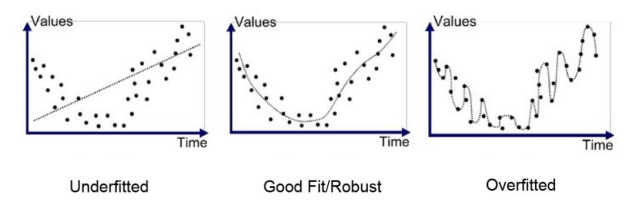

En los gráficos podemos observar los efectos del sobre ajuste y el sub ajuste en un modelo. Lo ideal siempre será hallar el punto medio.

* *Sesgo*

https://www.ucipfg.com/Repositorio/MGAP/MGAP-05/BLOQUE-ACADEMICO/Unidad-2/obligatorias/Clase_04_(Estadistica_inferencial%20_%20Estimacion_de_parametros).pdf

El sesgo mide la distancia que hay entre el valor esperado de nuestro modelo y el verdadero valor.

$$ sesgo(\hat{\beta}) = E(\hat{\beta}) - \beta$$

Básicamente, un modelo de regresión lineal busca que sus estimadores sean insesgados,es decir, el que tiene la menor varianza entre todos los posibles. Sin embargo, que sea el de menor varianza no garantiza que tenga una varianza lo suficientemente pequeña.

* *Variance bias tradeoff*

Si un modelo es demasiado simple y tiene muy pocos parámetros, entonces puede tener un alto sesgo y una baja varianza. Por otro lado, si un modelo tiene una gran cantidad de parámetros, tendrá una varianza alta y un sesgo bajo. Por lo tanto, debemos encontrar el equilibrio adecuado sin sobre ajustar o desajustar los datos.

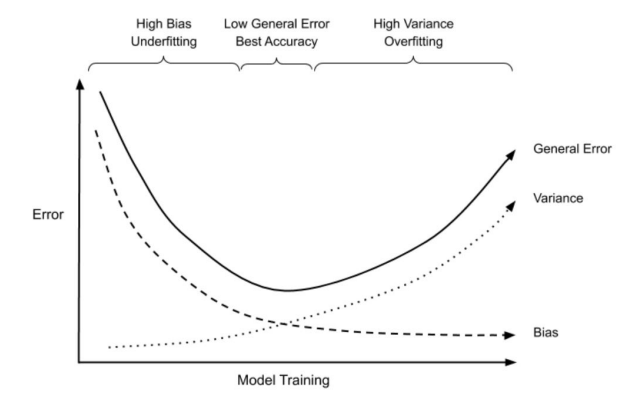

## **1.3 Regresión Ridge**

La regresión ridge es una técnica de regularización que se utiliza para mitigar el sobreajuste en modelos de regresión, especialmente cuando hay multicolinealidad entre las variables predictoras. Esta técnica agrega un término de penalización a la función de pérdida del modelo para evitar que los coeficientes de la regresión alcancen valores extremadamente altos.

Este tipo de modelo trata de una regresión con penalización, regulariza el modelo resultante imponiendo una penalización al tamaño de los coeficientes de la relación lineal entre las caracteristicas predictivas  y la variable objetivo.

Son modelos de regresion comunes, estimados por mínimos cuadrados, pero que además se incluyen penalizaciones para minimizar la suma de los cuadrados de los residuos, produciendo mejores coeficientes $\beta$. Esto se logra al añadir el cuadrado de la norma $L2$ del vector formado por los coeficientes.

En el caso simple, la fómula del estimador de mínimos cuadrados:

$$\hat{\beta} = mín\sum_{t=1}^n (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,s}\beta_j})^2$$

añadiendo a esta formula una penalización en los coeficientes, obteniendo:

$$\hat{\beta}^{ridge} = mín\sum_{t=1}^n (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,s}\beta_j})^2$$ 
$${sujeto a} , \sum_{j=1}^{p} \beta_{j}^2 \leq {h}, con, {h} >0$$

restringiendo los valores que toman los coeficientes impidiendo que puedean tomar valores demasiado altos. 

Otra forma de ver la restricción es:

$$\hat{\beta}^{ridge} = mín \Bigg\{ \sum_{t=1}^n (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,s}\beta_j})^2 +\lambda \sum_{j=1}^p {\beta}_j^2 \bigg\} $$

donde $\lambda \geq 0$ es un parámetro que se determina de forma separada de los $\beta$.

Miremos la nueva función objetivo

$$G(\beta) = \Bigg\{ \sum_{t=1}^n (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,s}\beta_j})^2 +\lambda \sum_{j=1}^p {\beta}_j^2 \bigg\} = RSS + \lambda\sum_{j=1}^p {\beta_j^2} $$

Encontrar un valor de $\beta$ que minimice a esta función se consigue balanceado dos criterios:

* El primer sumando es la RSS, minimizar RSS equivale a elegir $\beta$ que ajuste bien a los datos,

* el segundo sumando, $\lambda\sum_{j=1}^p {\beta_j^2}$ se denomina término de penalización (*shrinkage penalty*: penalización por contracción), se hace más chico cuanto más chica sean los $\beta$, mejor dicho, cuanto más chica sea la norma 2 del vector $\beta$, excluyendo el término independiente.

¿Qué ganamos con la regresión Ridge?

- Mínimos cuadrados es lo mismo que ajustar ridge con $\lambda =0$.
- Como se esperaba, ninguno de los coeficientes es cero: ¡La regresión ridge no selecciona variables!
- Los estimadores ridge son sesgados.
- La ventaja de la regresión ridge sobre OLS radica en el trade-off sesgo-varianza.A medida que aumenta $\lambda$, la flexibilidad del ajuste ridge disminuye, dando lugar a una disminucion de la varianza, pero un mayor sesgo.

En la regresión lineal tradicional, el objetivo es minimizar la suma de los cuadrados de los errores entre las predicciones del modelo y los valores reales. En cambio, la regularización `L2` busca minimizar esta suma de errores junto con otro término que es proporcional al cuadrado de los valores de los coeficientes del modelo. Matemáticamente, la función de pérdida con regularización L2 se ve de la siguiente manera:

$$MSE_{ridge} = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)}{n} + \lambda\sum_{j=1}^{n} {\beta_j^2}$$ 


* El sesgo agregado al modelo también se conoce como penalización de regresión de Ridge . Lo calculamos multiplicando `lambda` por el peso al cuadrado de cada característica individual.

* `λ` es un hiperparámetro, una perilla para ajustar el nivel de regularización. Si `theta` $(\theta)$ aumenta, el error total aumentará y, por lo tanto, el modelo no convergerá. Por lo tanto, siempre que el modelo intente aumentar el valor `theta`, será penalizado. De esta forma, te aseguras de que los valores theta no suban demasiado.

* Al acercar los pesos ($\theta$) a cero (o hacerlos cero), eliminamos características irrelevantes del modelo o limitamos sus efectos.



<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*5cVNc7Lt3gfHW0r8L492xQ.png" width = 800>


In [324]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# from sklearn.datasets import make_regression


Para trabajar en estos conceptos, utlizaremos el dataset [Resistencia del Hormigon](https://www.kaggle.com/datasets/maajdl/yeh-concret-data/) que utlizaremos para nuestro modelo.

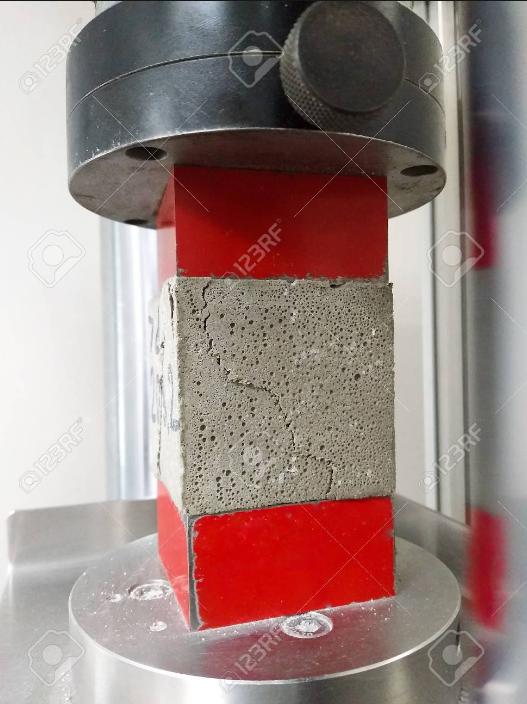

**Acerca del conjunto de datos**

**Contexto**

**Resumen**
El hormigon es el material más importante en la ingenieria civil.

La resistencia a la compresión es una función alatamente no lineal de la edad y los ingredientes.

**Contenido**

**Conjunto de datos de resistencia a la compresión del hormigon**

**Información del conjunto de datos:**

Número de instancias: 1030
Número de atributos: 9
Valores de atributos faltantes: Ninguno

**Información de atributos**
Se proporcionan el nombre de la variable, el tipo de variable, la unidad de medida y una breve descripción. La resistencia a la compresión del hormigón es el problema de regresión. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

*Nombre - Tipo de datos - Medición*

* Cemento  -- cuantitativo -- kg en una mezcla de m3 
* Escoria de alto horno  -- cuantitativa -- kg en una mezcla de m3 
* Cenizas volantes  -- cuantitativa - - kg en m3 de mezcla 
* Agua -- cuantitativo - kg en m3 de mezcla 
* Superplastificante  - cuantitativa - kg en m3 de mezcla 
* Agregado Grueso -- cuantitativo -- kg en una mezcla de m3 
* Agregado fino -- cuantitativo -- kg en una mezcla de m3 
* Edad -- cuantitativa -- Día (1~365) 
* Resistencia a la compresión del hormigón -- cuantitativa -- MPa 

In [325]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
display(df.head())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


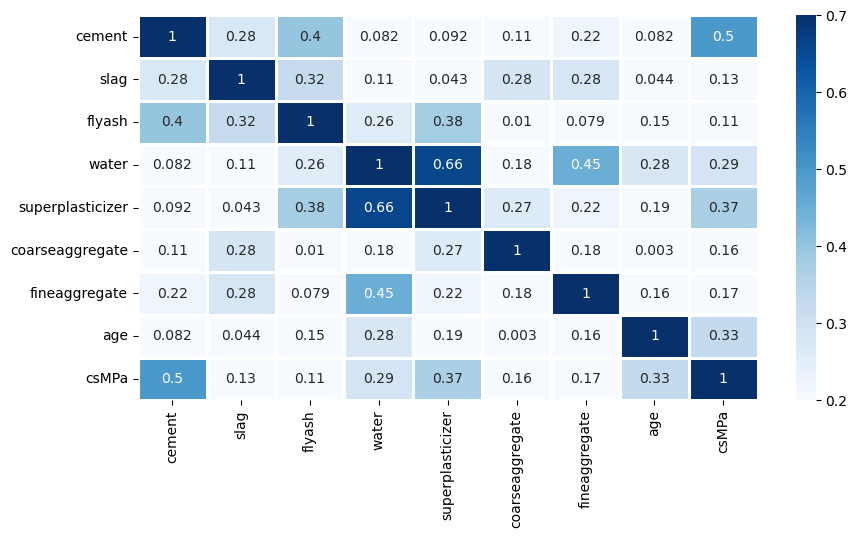

In [327]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr().abs(),annot = True, linewidths =2, vmin =0.2,vmax=0.7,cmap = 'Blues')
plt.show()

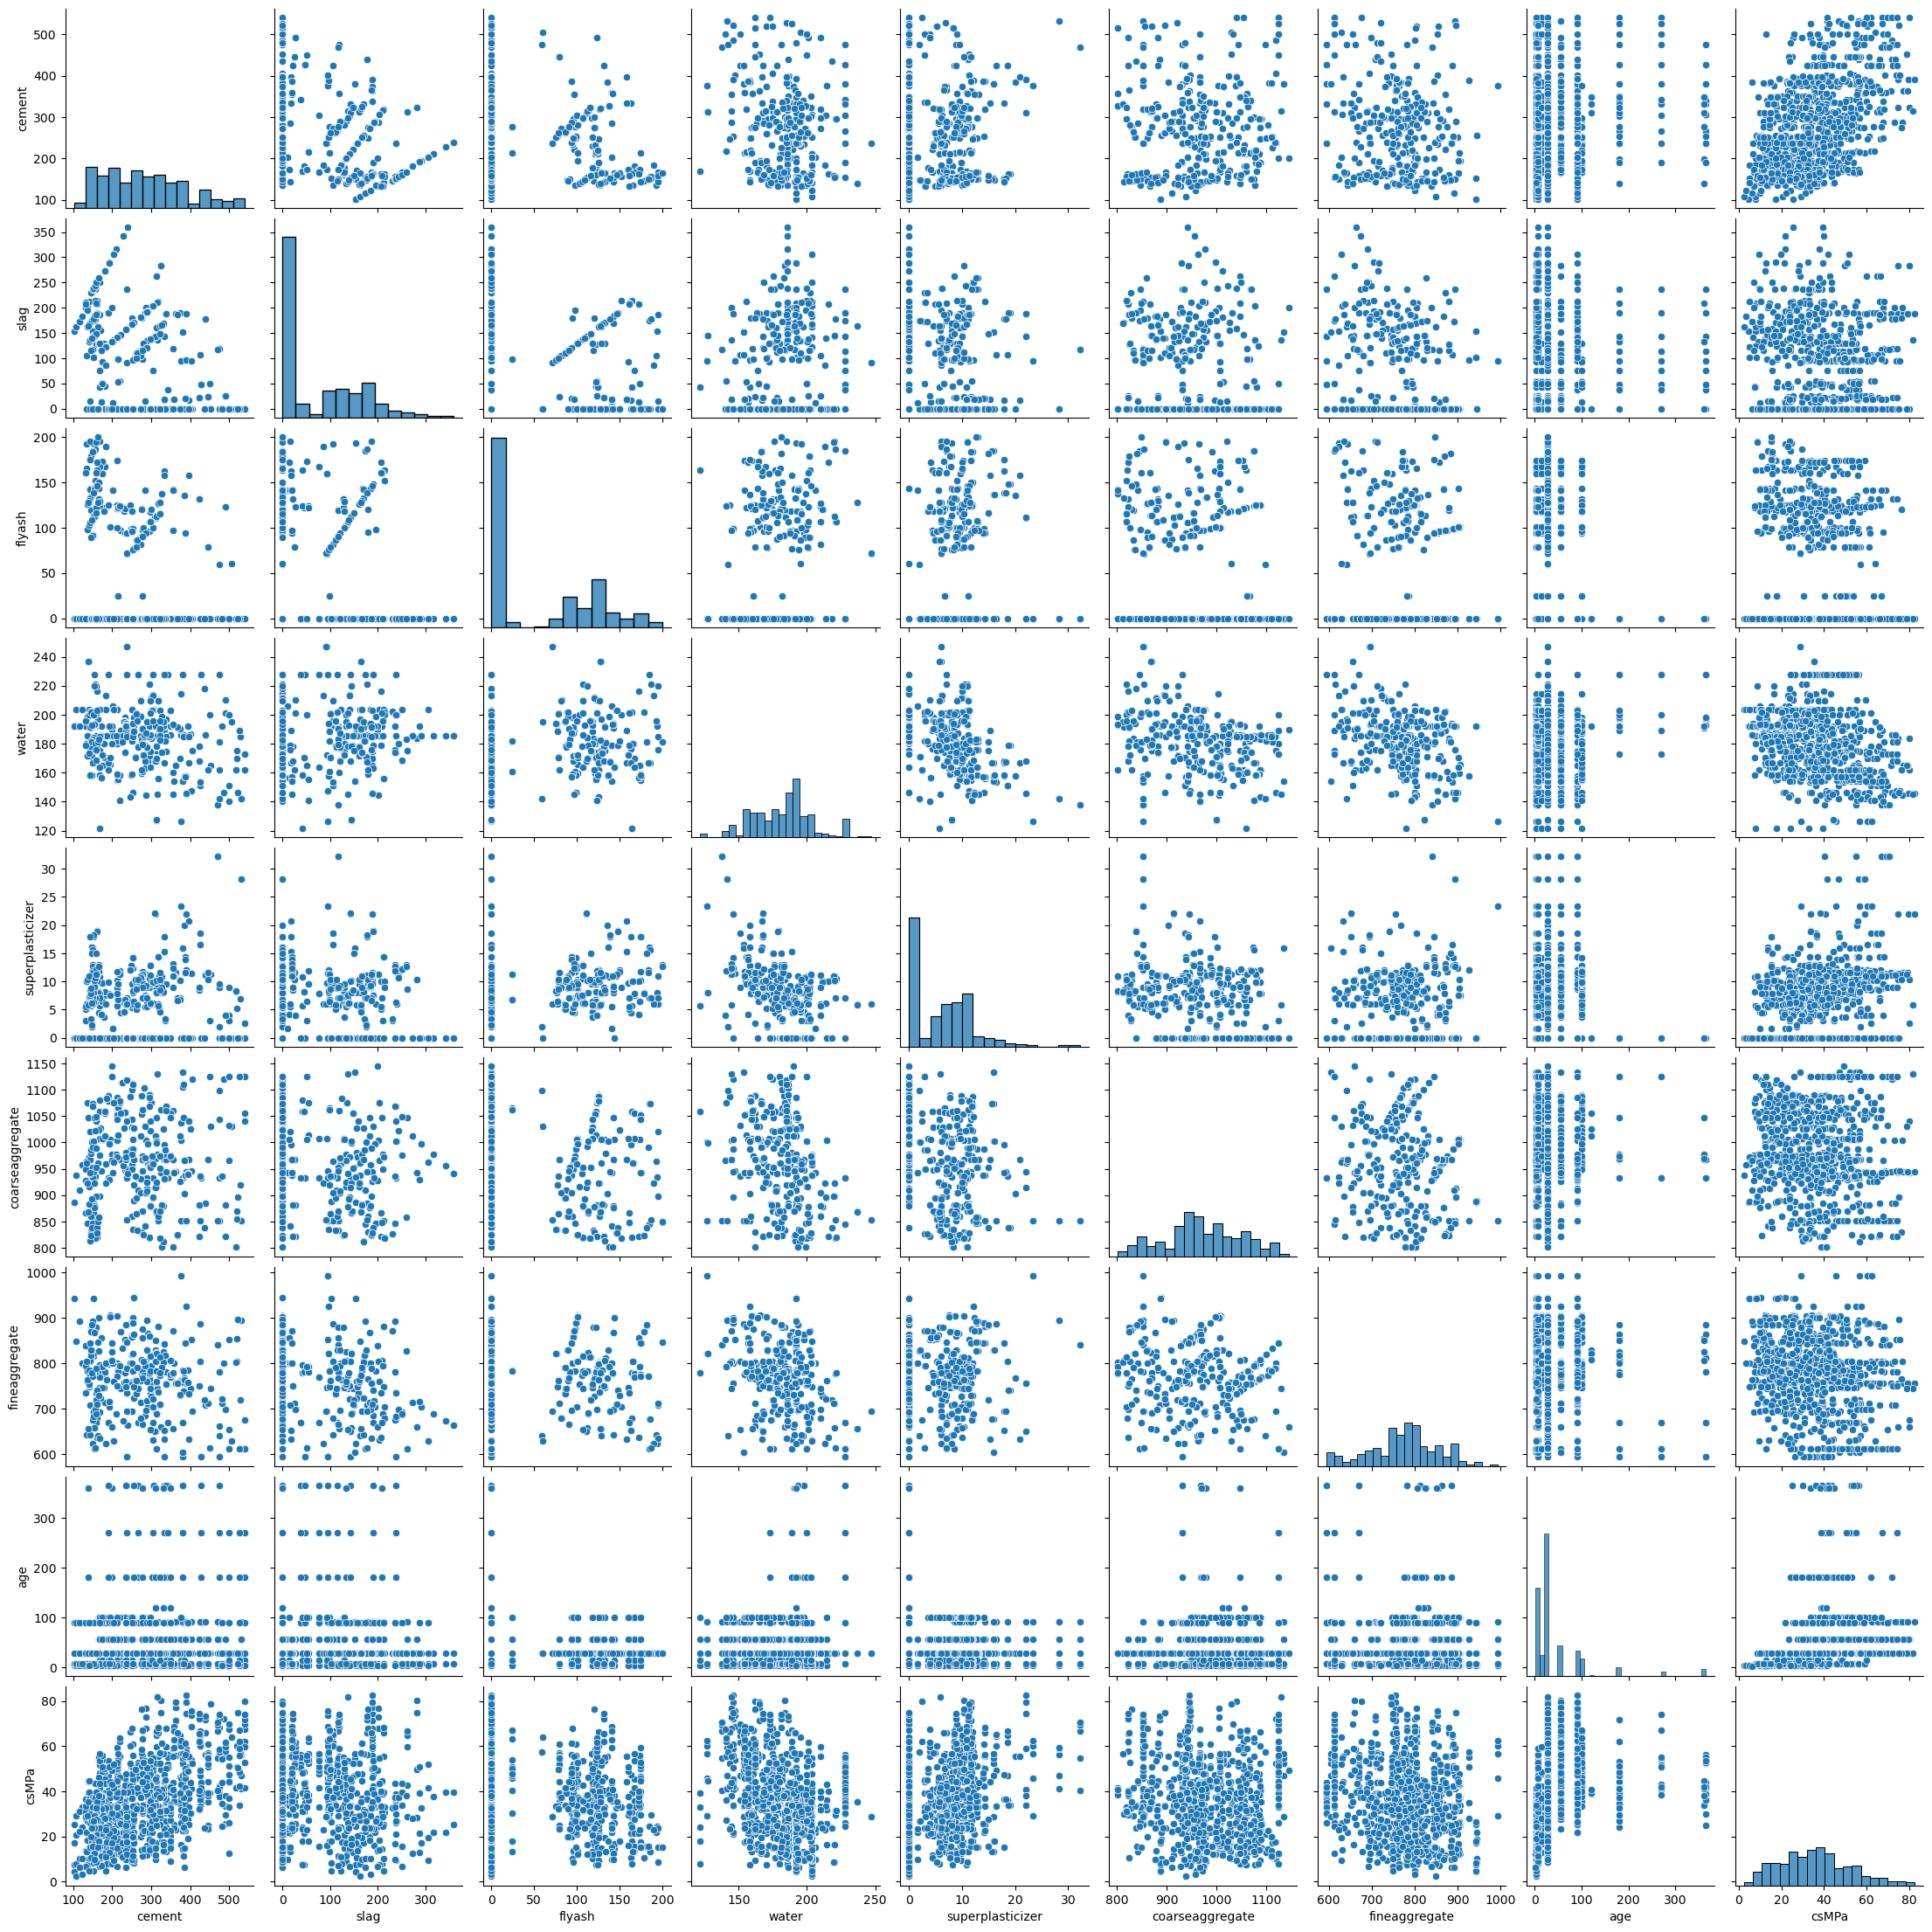

In [328]:
sns.pairplot(df)
plt.show()

In [329]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [330]:
X = df.drop(labels = 'csMPa',axis = 'columns')
y = df['csMPa']
display(X.head(3))

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270


In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True # indica si se deben barajar (reorganizar aleatoriamente) los datos antes de dividirlos en conjuntos de entrenamiento y prueba
                                                    )

In [332]:
ridge_model = Ridge(alpha=1)
ridge_model= ridge_model.fit(X_train,y_train)
ridge_model

Ridge(alpha=1)

In [333]:
lasso_model = Lasso(alpha=1)
lasso_model = lasso_model.fit(X_train,y_train)
lasso_model

Lasso(alpha=1)

In [334]:
elasticnet_model = ElasticNet(alpha=1,l1_ratio=0.5)
elasaticnet_model = elasticnet_model.fit(X_train,y_train)
elasticnet_model

ElasticNet(alpha=1)

In [335]:
# Realizar predicciones en el conjunto de Train
ridge_pred_train = ridge_model.predict(X_train)
lasso_pred_train = lasso_model.predict(X_train)
elasticnet_pred_train = elasticnet_model.predict(X_train)

In [336]:
# Calcular el Eror Cuadrático Medio (MSE) para cada modelo vs. train
ridge_mse_train = mean_squared_error(y_train,ridge_pred_train)
lasso_mse_train = mean_squared_error(y_train,lasso_pred_train)
elasticnet_mse_train = mean_squared_error(y_train,elasticnet_pred_train)
print(f'MSE de Ridge(Train): {ridge_mse_train:.2f}')
print(f'MSE de Lasso(Train): {lasso_mse_train:.2f}')
print(f'MSE de Elastic Net(Train): {elasticnet_mse_train:.2f}')


MSE de Ridge(Train): 110.64
MSE de Lasso(Train): 110.70
MSE de Elastic Net(Train): 110.67


In [337]:
# Realizar predicciones en el conjunto de prueba
ridge_pred_test = ridge_model.predict(X_test)
lasso_pred_test = lasso_model.predict(X_test)
elasticnet_pred_test = elasticnet_model.predict(X_test) 

In [338]:
# Calcular el Eror Cuadrático Medio (MSE) para cada modelo vs. test
ridge_mse_test = mean_squared_error(y_true=y_test, y_pred=ridge_pred_test)
lasso_mse_test = mean_squared_error(y_true=y_test,y_pred=lasso_pred_test)
elastinect_mse_test = mean_squared_error(y_true=y_test,y_pred=elasticnet_pred_test)
print(f'MSE de Ridge: {ridge_mse_test:.2f}')
print(f'MSE de Lasso: {lasso_mse_test:.2f}')
print(f'MSE de Elastic Net: {elastinect_mse_test:.2f}')

MSE de Ridge: 95.97
MSE de Lasso: 95.96
MSE de Elastic Net: 95.95


In [339]:
dict = {
    'Modelo':['Ridge','Lasso','Elastic Net'],
    'MSE - Train':[ridge_mse_train,lasso_mse_train,elasticnet_mse_train],
    'MSE - Test':[ridge_mse_test,lasso_mse_test,elastinect_mse_test]
}

In [340]:
comparacion_modelos = pd.DataFrame(dict)
comparacion_modelos


,Modelo,MSE - Train,MSE - Test
0,Ridge,110.644887,95.970896
1,Lasso,110.704440,95.959391
2,Elastic Net,110.668754,95.945887


### **1.3.1 Validación Cruzada(Cross - Validation)**

En esta sección se describe el criterio de validación cruzada, este criterio tiene la ventaja de realizar la estimación del *test error* de forma directa y requiere de menos suposiciones.

En general, el procedimiento de este criterio consiste dividir las observaciones de la muestra disponible en dos conjuntos de entrenamiento y de prueba, luego se ajusta el modelo con la muestra de entrenamiento y finalmente se evalúa el modelo con la muestra de prueba.

**Tipos de validación**

#### **1.3.1.1 Validación simple**

Este tipo de validación consiste en dividir aleatoriamente las observaciones disponibles en dos grupos iguales, la muestra de entrenamiento se emplea para ajustar el modelo y la muestra de prueba se usa para evaluar el modelo.

Figura: Interpretación geometrica de validación simple

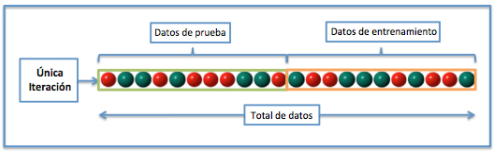

Este tipo de validación es la más simple, pero presenta dos problemas importantes:

1. `Problema de varianza`. La estimacion de `test error` es altamente variable dependiendo de las observaciones que se incluyan en la muestra de entrenamiento y cuáles como muestra de prueba.

2. `Problema de sesgo.` Al dividir las observaciones disponibles como muestra de entrenamiento, se disponde de menos información para el ajuste del modelo y por lo tanto se reduce su capacidad de precisión. En consecuencia, puede presentar un sobreajuste del `test error` comparado al que se obtendría si se emplearan todas las observaciones del conjunto de entrenamiento.

#### **1.3.1.2 Validación cruzada dejando uno fuera**

La validación cruzada dejando uno fuera o *leave one out cross-validation* (LOOCV), se realiza de forma iterativa, se inicia empleando como muestra de entrenamiento, todas las observaciones disponibles excepto una, que se excluye para emplearla como muestra de prueba (conjunto unitario).

Si se emplea una única observación para calcular el `test error` , este varía mucho dependiendo de que observación se haya seleccionado. Para evitar este inconveniente, el proceso se repite tantas veces como observaciones disponibles, excluyendo en cada iteración una observación distinta, ajustando el modelo con el resto y calculando el error con dicha observación.
Finalmente, el `test error` estimado por el metodo LOOCV es el promedio de todos los $i$ errores calculados $(MSE_{i})$.

$$CV-error_{(n)} = \frac{1}{n}\sum_{i=1}^n MSE_{i}$$

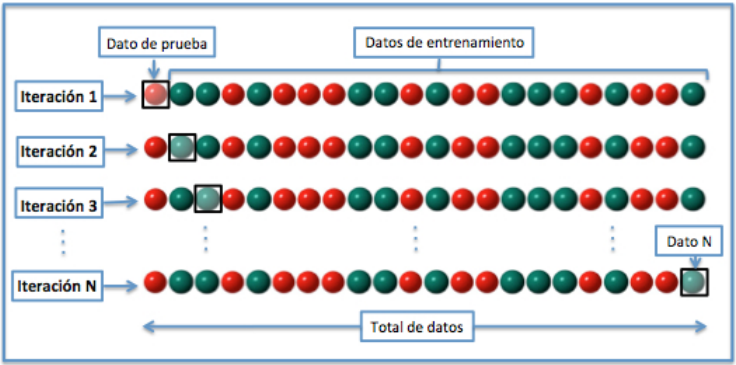

Figura: Interpretación geométrica de LOOCV.

Según, LOOCV reduce la variabilidad que se presenta en la validación simple, ya que al final del proceso se acaban empleando todos las observaciones disponibles tanto como observaciones de entrenamiento como observaciones de prueba.Sin embargo, LOOCV tiene un coste computacional muy alto, ya que este proceso iterativo requiere que el modelo sea reajustado y validado tantas veces como observaciones disponibles $n$ se tenga, lo que en algunos casos puede ser muy complicado.

Por otro lado, consideran que , al emplearse todas las observaciones disponibles como muestra de entrenamiento, se puede estar cayendo en sobreajuste, por lo que recomiendan emplear el método de validación cruzada de k-iteraciones, que se presenta a continuación.


#### **1.3.1.3 Validación cruzada de k-iteraciones**

La validación cruzada de k-iteraciones o *K-Fold Cross-Validation*, es un proceso iterativo, que consiste en dividir los datos de la muestra de forma aleatoria en k grupos de aproximadamente del mismo tamaño, los `K-1` grupos se emplean para ajustar el modelo (muestra de entrenamiento) y uno de los grupos se emplea como muestra de prueba, este proceso se repite `K-veces` utilizando un grupo distinto como muestra de prueba en cada iteración.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png
" width = 800>

El proceso genera `K` estimaciones del `test error` cuyo promedio se emplea como estimación final, esto es,

$$CV-error_{(K)} = \frac{1}{K} \sum_{i=1}^K {MSE_{i}}$$

El método de validación cruzada de `K-iteraciones` es mucho mejor que LOOCV, ya que posee dos ventajas muy importantes:

1. **Balance entre sesgo y varianza:** LOOCV esta en un extremo de sesgo bajp con alta varianza y dividir el conjunto de observaciones en menos bloques conllevaría tener mayor sesgo y menor varianza.
El equilibrio no esta en ninguno de los extremos, por lo cual ese recomienda dividir el conjunto de observaciones en `K=5 o 10` ya que consigue un mejor balance entre sesgo y varianza.

2. **Computacional:** El número de iteraciones necesarias viene determinado por el valor `K` escogido, en consecuencias LOOCV tiene un coste computacional muy alto. Por lo general se recomienda que $K \in [5,10]$


In [341]:
params = {
    'alpha': np.arange(start=0,stop=2,step = 0.05),
    'fit_intercept':[True,False]
}

In [342]:
modelo_ridge = Ridge(random_state=42)
grid_search = GridSearchCV(modelo_ridge,params,
                           cv=4,#sE ESTÁ UTILIZANDO VALIDACION CRUZADA K-FOLD CON K=5.
                           scoring='neg_root_mean_squared_error', # Raíz del error cuadratico medio negativo(RMSE)
                           n_jobs=-1, # Permite que paralelice el proceso si es posible utilizando todos los nucleos disponibles en tu máquina
                           verbose = 1 # Proporciona informacion detallada sobre el proceso de busqueda de hiperparametros
                           )
modelo_ridge = grid_search.fit(X_train,y_train)
print(f'Mejor score promedio MSE: {np.absolute(modelo_ridge.best_score_)}')
print(f'Mejores Hiperparámetros: {modelo_ridge.best_params_}')

Fitting 4 folds for each of 80 candidates, totalling 320 fits
Mejor score promedio MSE: 10.684521457970177
Mejores Hiperparámetros: {'alpha': 1.9500000000000002, 'fit_intercept': False}


In [343]:
ridge_model = Ridge(alpha=1.95, fit_intercept=False)
ridge_model.fit(X_train,y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_mse_train = mean_squared_error(y_train, ridge_pred_train)
ridge_mse_test = mean_squared_error(y_test, ridge_pred_test)
print(f'MSE ridge - train: {ridge_mse_train:.2f}')
print(f'MSE ridge - Test: {ridge_mse_test:.2f}')

MSE ridge - train: 110.78
MSE ridge - Test: 95.85


In [344]:
coef_ridge = ridge_model.coef_[0]
coef_ridge

array([ 0.11103535,  0.09902682,  0.07138418, -0.17481928,  0.27672225,
        0.00822056,  0.01311722,  0.11608768])

In [345]:
abs_coef_ridge = np.abs(coef_ridge)
indices_ordenados = np.argsort(abs_coef_ridge)[::-1]
nombres_variables = X_train.columns.values
print(indices_ordenados)
print(abs_coef_ridge)
print(len(coef_ridge))

[4 3 7 0 1 2 6 5]
[0.11103535 0.09902682 0.07138418 0.17481928 0.27672225 0.00822056
 0.01311722 0.11608768]
8


In [346]:
abs_coef_ridge[indices_ordenados]

array([0.27672225, 0.17481928, 0.11608768, 0.11103535, 0.09902682,
       0.07138418, 0.01311722, 0.00822056])

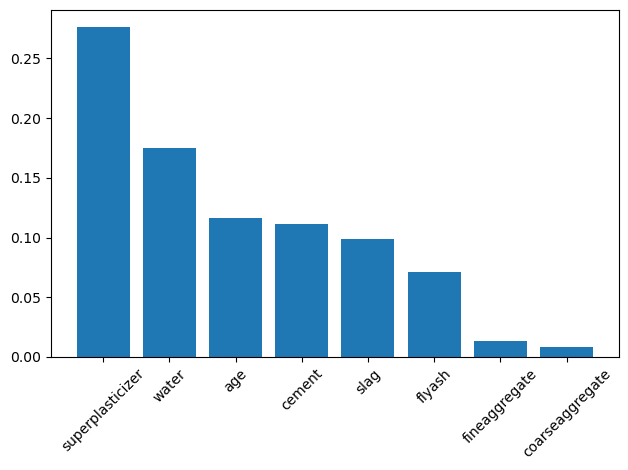

In [347]:
plt.bar(range(len(coef_ridge)),abs_coef_ridge[indices_ordenados])
plt.xticks(ticks = range(len(indices_ordenados)),labels = nombres_variables[indices_ordenados],rotation = 45)
plt.tight_layout()
plt.show()

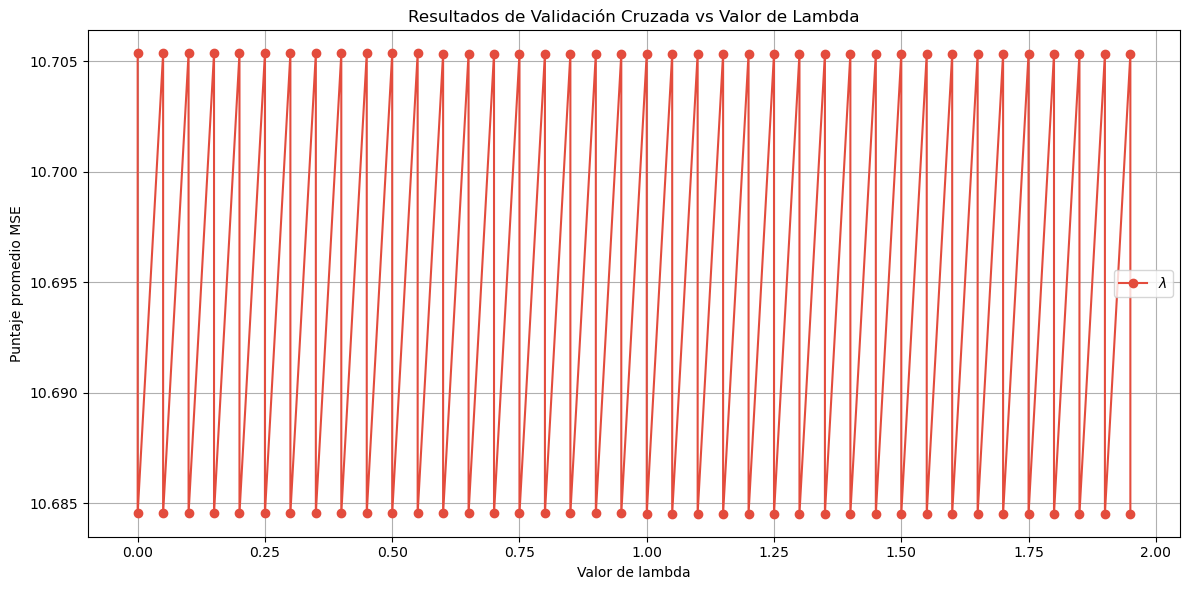

In [348]:
# Estraer los resultados de la validación cruzada
# ======================================================================================================================
results = grid_search.cv_results_
lambdas = results['param_alpha']
mean_test_scores = results['mean_test_score']

# Convierte los resultados en arrays NumPy
# ================================================================================================================================
lambdas = np.array(lambdas)
mean_test_scores = np.array(mean_test_scores)*-1

# Grafica de los resultados
plt.figure(figsize = (12,6))
plt.plot(lambdas,mean_test_scores,marker = 'o',linestyle = '-',color = '#E34C3D',label = '$\lambda$')
plt.title('Resultados de Validación Cruzada vs Valor de Lambda')
plt.xlabel('Valor de lambda')
plt.ylabel('Puntaje promedio MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **1.4 Regresión Lasso**

La `regresión Lasso` es una técnica de regularización que no solo ayuda a prevenir el sobreajuste, sino que también puede llevar a una selección automática de variables al forzar algunos coeficientes a ser exactamente cero, eliminando así predictores menos relevantes o redundantes del modelo.Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro $\lambda$. Cuando $\lambda = 0$, el resultado es equivalente al de un modelo lineal por `OLS`. A medida que $\lambda$ aumenta, mayor es la penalización y más predictores quedan excluidos. La penalización Lasso se conoce tambien como `L1`.

La forma de restricción es:

$$\hat{\beta}^{ Lasso} = mín\sum_{t=1}^{n} (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,j} \beta_j})^2 $$

$sujeto$ $a,$ $$\sum_{j=1}^{p} {|\beta_{j}|} \leq h $$ con $h\geq 0$

O de forma Lagrangiana:

$$\hat{\beta}^{ Lasso} = mín\bigg\{\sum_{t=1}^{n} (Y_t - \beta_0 - \sum_{j=1}^{p}{X_{t,j} \beta_j})^2 + \lambda \sum_{j=1}^{p} {|\beta_{j}|} \bigg\}$$

con $\lambda \geq 0$

La regresión de lazo es casi idéntica a la regresión de cresta, la única diferencia es que tomamos el valor absoluto en lugar de elevar al cuadrado los pesos al calcular la penalización de la regresión de cresta.

$$MSE_{Lasso} = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} + \lambda \sum_{j=1}^p {|\beta_j|}$$

* Como resultado de tomar el valor absoluto, la regresión Lasso puede reducir la pendiente hasta 0, mientras que la regresión Ridge solo puede reducir la pendiente asintóticamente cerca de 0.
* Dado que la regresión de Lasso puede excluir variables inútiles de las ecuaciones estableciendo la pendiente en 0, es un poco mejor que la regresión de Ridge para reducir la varianza en modelos que contienen muchas características irrelevantes.

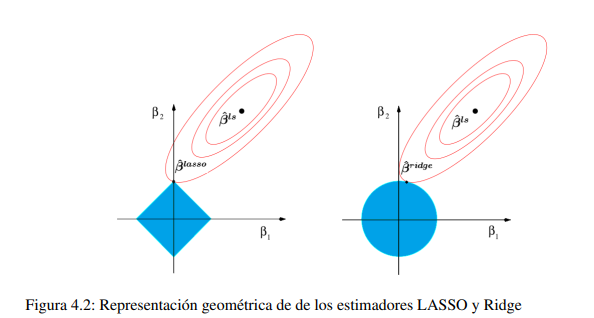

In [349]:
params = {
    'alpha':np.arange(start=0 ,stop= 2.05, step = 0.05),
    'fit_intercept':[True,False]
}

In [350]:
model_lasso = Lasso(random_state=42)
grid_search_lasso = GridSearchCV(model_lasso,params,cv = 4,scoring = 'neg_root_mean_squared_error',n_jobs = -1,verbose = 1)
model_lasso = grid_search_lasso.fit(X_train,y_train)
print(f'Mejor promedio score MSE: {np.abs(model_lasso.best_score_)}')
print(f'Mejores Hiperparámetros: {model_lasso.best_params_}')

Fitting 4 folds for each of 82 candidates, totalling 328 fits


/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Mejor promedio score MSE: 10.68418537780575
Mejores Hiperparámetros: {'alpha': 0.45, 'fit_intercept': False}


In [351]:
model_lasso = Lasso(alpha=0.45,fit_intercept=False)
model_lasso.fit(X_train,y_train)
lasso_pred_train = model_lasso.predict(X_train)
lasso_pred_test = model_lasso.predict(X_test)
lasso_mse_train =mean_squared_error(y_train,lasso_pred_train)
lasso_mse_test =mean_squared_error(y_test,lasso_pred_test)
print(f'MSE de Lasso - Train : {lasso_mse_train:.2f}')
print(f'MSE de Lasso - Test : {lasso_mse_test:.2f}')

MSE de Lasso - Train : 110.79
MSE de Lasso - Test : 95.87


In [352]:
ridge_model.coef_

array([[ 0.11103535,  0.09902682,  0.07138418, -0.17481928,  0.27672225,
         0.00822056,  0.01311722,  0.11608768]])

In [353]:
model_lasso.coef_

array([ 0.11158625,  0.09961735,  0.07254478, -0.17631575,  0.25273848,
        0.0080498 ,  0.01354692,  0.11590815])

## **1.5 Regresión Elastic Net**

La regresión Elastic Net combina los términos de penalización de la regresión Ridge (que utiliza la suma de los coeficientes al cuadrado) y la regresión Lasso (que utiliza la suma de los valores absolutos de los coeficientes). Al hacerlo, busca aprovechar las ventajas de ambas técnicas y superar algunas limitaciones individuales, permitiendo una selección de variables más robusta y controlando la multicolinealidad.

Al combinar la regresión de `lasso` y `Rige` obtenemos la regresión Elastic-Net. Elastic-Net Regression agrupa y reduce los parámetros asociados con variables correlacionadas y los deja en la ecuación o los elimina todos a la vez.

$$MSE_{Elastic Net} = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} + \lambda_1 \sum_{j=1}^{p} {|\beta_j|} + \lambda_2 \sum_{j=1}^p {\beta_j^2}$$

La regresión Elastic Net combina los términos de penalización de la regresión Ridge (que utiliza la suma de los coeficientes al cuadrado) y la regresión Lasso (que utiliza la suma de los valores absolutos de los coeficientes). Al hacerlo, busca aprovechar las ventajas de ambas técnicas y superar algunas limitaciones individuales, permitiendo una selección de variables más robusta y controlando la multicolinealidad.

* La penalización de Regresión de Lasso y la penalización de Regresión de Ridge obtienen cada una su propia lambda.



## **1.6 Resumen**

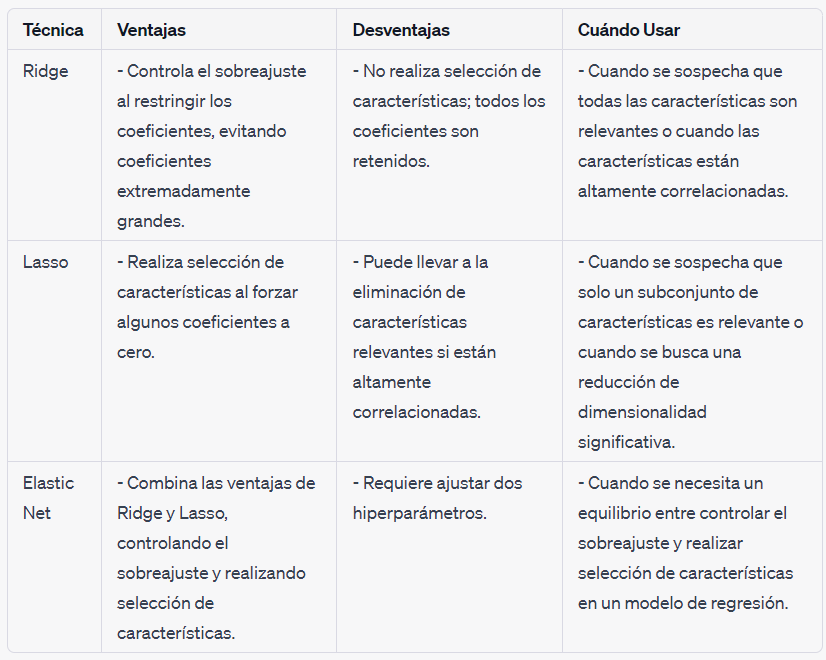

In [354]:
params = {
    'alpha':np.arange(start=0,stop = 2.05,step = 0.05),
    'fit_intercept':[True,False],
    'l1_ratio': np.arange(0,1,0.2)
}

In [355]:
model_elasticnet = ElasticNet(random_state=42)
grid_search_EN = GridSearchCV(model_elasticnet,params,cv = 4,scoring= 'neg_root_mean_squared_error',n_jobs = -1,verbose = 1)
model_elasticnet = grid_search_EN.fit(X_train,y_train)
print(f'Mejor score promedio MSE: {np.absolute(model_elasticnet.best_score_)}')
print(f'Mejores Hiperparametros: {model_elasticnet.best_params_}')

Fitting 4 folds for each of 410 candidates, totalling 1640 fits


/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Mejor score promedio MSE: 10.675354991105763
Mejores Hiperparametros: {'alpha': 2.0, 'fit_intercept': False, 'l1_ratio': 0.0}


/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+04, tolerance: 9.617e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+04, tolerance: 9.663e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

In [356]:
model_elasticnet.best_params_

{'alpha': 2.0, 'fit_intercept': False, 'l1_ratio': 0.0}

In [357]:
model_elasticnet = ElasticNet(alpha=2,l1_ratio=0,fit_intercept=False)
model_elasticnet.fit(X_train,y_train)
elasticnet_pred_train = model_elasticnet.predict(X_train)
elasticnet_pred_test = model_elasticnet.predict(X_test)
elasticnet_mse_train = mean_squared_error(y_train,elasticnet_pred_train)
elasticnet_mse_test = mean_squared_error(y_test,elasticnet_pred_test)
print(f'MSE de Elastic Net - Train: {elasticnet_mse_train:.2f}')
print(f'MSE de Elastic Net - Test: {elasticnet_mse_test:.2f}')


MSE de Elastic Net - Train: 110.79
MSE de Elastic Net - Test: 95.84


In [358]:
# Obtener coeficientes del modelo
# ============================================================================================================================
coef = model_elasticnet.coef_
coef

array([ 0.11183351,  0.09995032,  0.07307208, -0.17743971,  0.24596958,
        0.00804959,  0.01369927,  0.11604553])

In [359]:
# Obtener el valor absoluto de los coeficientes y sus índices correspondientes
# ========================================================================================================================
abs_coefficients = np.abs(coef)
indices_ordenados = np.argsort(abs_coefficients)[::-1]  # Ordenar los índices de mayor a menor importancia
print(abs_coefficients)
print(indices_ordenados)

[0.11183351 0.09995032 0.07307208 0.17743971 0.24596958 0.00804959
 0.01369927 0.11604553]
[4 3 7 0 1 2 6 5]


In [360]:
# Nombres de las variables 
# =======================================================================================================================
nombres_variables = np.array([f'Variable - {i}' for i in X_train.columns])
nombres_variables

array(['Variable - cement', 'Variable - slag', 'Variable - flyash',
       'Variable - water', 'Variable - superplasticizer',
       'Variable - coarseaggregate', 'Variable - fineaggregate',
       'Variable - age'], dtype='<U27')

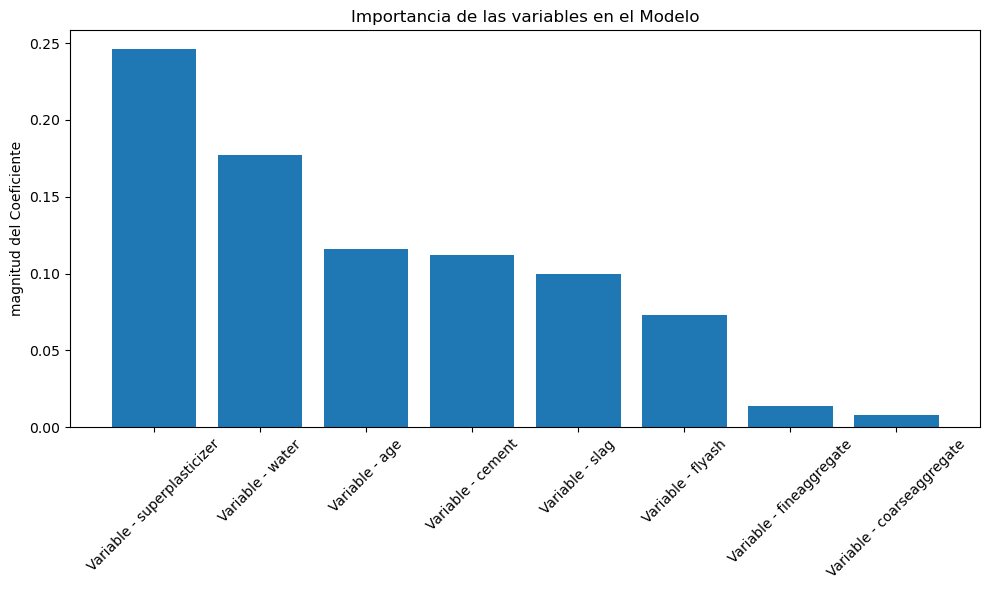

In [361]:
# Crear gráfico de barras
# ==========================================================================================================================
plt.figure(figsize = (10,6))
plt.bar(range(len(indices_ordenados)),abs_coefficients[indices_ordenados],align= 'center')
plt.xticks(ticks = range(len(indices_ordenados)),labels = nombres_variables[indices_ordenados],rotation = 45)
plt.ylabel('magnitud del Coeficiente')
plt.title('Importancia de las variables en el Modelo')
plt.tight_layout()
plt.show()

In [362]:
regularizacion = {
    'Modelo':['Ridge','Lasso','Elastic Net'],
    'MSE - Train':[ridge_mse_train,lasso_mse_train,elasticnet_mse_train],
    'MSE - Test':[ridge_mse_test,lasso_mse_test,elastinect_mse_test]
}

In [363]:
reg = pd.DataFrame(regularizacion)
reg

,Modelo,MSE - Train,MSE - Test
0,Ridge,110.775993,95.849599
1,Lasso,110.785015,95.865953
2,Elastic Net,110.789598,95.945887


In [364]:
comparacion_modelos

,Modelo,MSE - Train,MSE - Test
0,Ridge,110.644887,95.970896
1,Lasso,110.704440,95.959391
2,Elastic Net,110.668754,95.945887


## **1.7 Automatizacion**

In [377]:
def regularizacion(X_train,y_train,X_test,y_test,cv=5):
    
    model = [Ridge,Lasso,ElasticNet]
    mse_train = []
    mse_test = []
    lambdas = []
    interceptos = []
    l1_ratios = []
    
    fig,ax = plt.subplots(ncols=2,nrows=2,figsize = (18,10))
    for i,m in enumerate(model):
        
        if m != ElasticNet:
            
            params = {
                'alpha':np.arange(start = 0, stop = 2,step = 0.05),
                'fit_intercept':[True,False]
            }
            modelo =m(random_state=42)
            grid_search_cv = GridSearchCV(modelo,params,cv=cv,scoring='neg_root_mean_squared_error',n_jobs = -1,verbose = 1)
            modelo = grid_search_cv.fit(X_train,y_train)
            alpha1 = modelo.best_params_['alpha']
            fit_intercept1 = modelo.best_params_['fit_intercept']
            l1_ratio = ''
            
            modelo_reg = m(alpha=alpha1,fit_intercept=fit_intercept1)
            modelo_reg.fit(X_train,y_train)
            pred_modelo_train = modelo_reg.predict(X_train)
            pred_modelo_test = modelo_reg.predict(X_test)
            mse_modelo_train = mean_squared_error(y_true=y_train,y_pred=pred_modelo_train)
            mse_modelo_test = mean_squared_error(y_true=y_test,y_pred=pred_modelo_test)
              
                      
            # Extraer los resultados en arrays Numpy
            # ===============================================================================================================
            results = grid_search_cv.cv_results_
            alphas = results['param_alpha']
            mean_test_scores = results['mean_test_score']*-1
            
            nombres_variables = X_train.columns.values
            
            if i == 0:
                coef = modelo_reg.coef_[0]
                abs_coef = np.abs(coef)
                indices_ordenados = np.argsort(abs_coef)[::-1]
                ax[i,1].bar(range(len(indices_ordenados)),abs_coef[indices_ordenados],color = '#71BFF0')
                ax[i,1].set_xticks(range(len(coef)))
                ax[i,1].set_xticklabels(nombres_variables[indices_ordenados],rotation= 45)
                ax[i,1].set_title('Importancia de las variables en el Modelo - '+ str(m()))
            else: 
                coef = modelo_reg.coef_
                abs_coef = np.abs(coef)
                indices_ordenados = np.argsort(abs_coef)[::-1]
                ax[i,1].bar(range(len(indices_ordenados)),abs_coef[indices_ordenados],color = '#EFD0AA')
                ax[i,1].set_xticks(range(len(coef)))
                ax[i,1].set_xticklabels(nombres_variables[indices_ordenados],rotation= 45)
                ax[i,1].set_title('Importancia de las variables en el Modelo - '+ str(m()))
                
            mse_train.append(mse_modelo_train)
            mse_test.append(mse_modelo_test)
            lambdas.append(alpha1)
            interceptos.append(fit_intercept1)
            l1_ratios.append(l1_ratio)
            
        else:
            params = {
                'alpha':np.arange(start = 0,stop = 2,step = 0.05),
                'fit_intercept':[True,False],
                'l1_ratio':np.arange(0,1,0.2)
            }
            
            modelo = m(random_state=42)
            grid_search_en = GridSearchCV(modelo,params,cv = cv,scoring= 'neg_root_mean_squared_error',n_jobs = -1,verbose = 1)
            modelo_en = grid_search_en.fit(X_train,y_train)
            alpha2 = modelo_en.best_params_['alpha']
            fit_intercept2 = modelo_en.best_params_['fit_intercept']
            l1_ratio2 = modelo_en.best_params_['l1_ratio']
            
            modelo_en = m(alpha=alpha2,fit_intercept=fit_intercept2,l1_ratio=l1_ratio2)
            modelo_en.fit(X_train,y_train)
            pred_modelo_train = modelo_en.predict(X_train)
            pred_modelo_test = modelo_en.predict(X_test)
            mse_modelo_train = mean_squared_error(y_true=y_train,y_pred=pred_modelo_train)
            mse_modelo_test = mean_squared_error(y_true=y_test,y_pred=pred_modelo_test)
            
            # Obtener coeficientes del modelo
            # ================================================================================================================
            coef = modelo_en.coef_
            
            # Obtener el valor absoluto de los coeficientes y sus índices correspondientes
            abs_coef = np.abs(coef)
            indices_ordenados = np.argsort(abs_coef)[::-1]
            nombres_variables = X_train.columns.values
            
            ax[1,0].bar(range(len(coef)),abs_coef[indices_ordenados],align = 'center',color = '#BC0AF0',edgecolor = 'black')
            ax[1,0].set_xticks(range(len(coef)))
            ax[1,0].set_xticklabels(nombres_variables[indices_ordenados],rotation= 45)
            ax[1,0].set_title('Importancia de las variables en el Modelo - Elastic Net')
            ax[1,0].set_ylabel('Magnitud del coeficiente')
            
            mse_train.append(mse_modelo_train)
            mse_test.append(mse_modelo_test)
            lambdas.append(alpha2)
            interceptos.append(fit_intercept2)
            l1_ratios.append(str(l1_ratio2))
            
            # Extraer los resultados de la validación cruzada
            # ===============================================================================================================
            results = grid_search_en.cv_results_
            alphas = results['param_alpha']
            mean_test_scores  = results['mean_test_score']*-1
        
        #plt.figure(figsize = (10,6))
        ax[0,0].plot(alphas,mean_test_scores,marker = '.',linestyle= '-',label= '$\lambda -$'+ str(m()))
        ax[0,0].set_title('Puntaje MSE vs Valor de Alpha en Validación Cruzada')
        ax[0,0].set_xlabel('Valor de lambda')
        ax[0,0].set_ylabel('Puntaje MSE')
        ax[0,0].grid(True)
        ax[0,0].legend()
        
    plt.tight_layout()
        
        # plt.plot(alphas,mean_test_scores,marker = '.',linestyle= '-',label= '$\lambda -$'+ str(m()))
        # plt.title('Puntaje MSE vs Valor de Alpha en Validación Cruzada')
        # plt.xlabel('Valor de lambda')
        # plt.ylabel('Puntaje MSE')
        # plt.legend()
        # plt.grid(True)
        #plt.tight_layout
        #plt.show()
           
    dict = {
        'Modelo':['Ridge','Lasso','Elastic Net'],
        'MSE - Train':mse_train,
        'MSE - Test':mse_test,
        'Lambda':lambdas,
        'fit_intercept':interceptos,
        'L1_ratio':l1_ratios
       }
        
    df_reg = pd.DataFrame(dict)
    
    return df_reg 
    

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits


/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/llanos_renzo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/ll

,Modelo,MSE - Train,MSE - Test,Lambda,fit_intercept,L1_ratio
0,Ridge,110.775993,95.849599,1.95,False,
1,Lasso,110.776986,95.853089,0.15,False,
2,Elastic Net,110.789006,95.836221,1.95,False,0.0


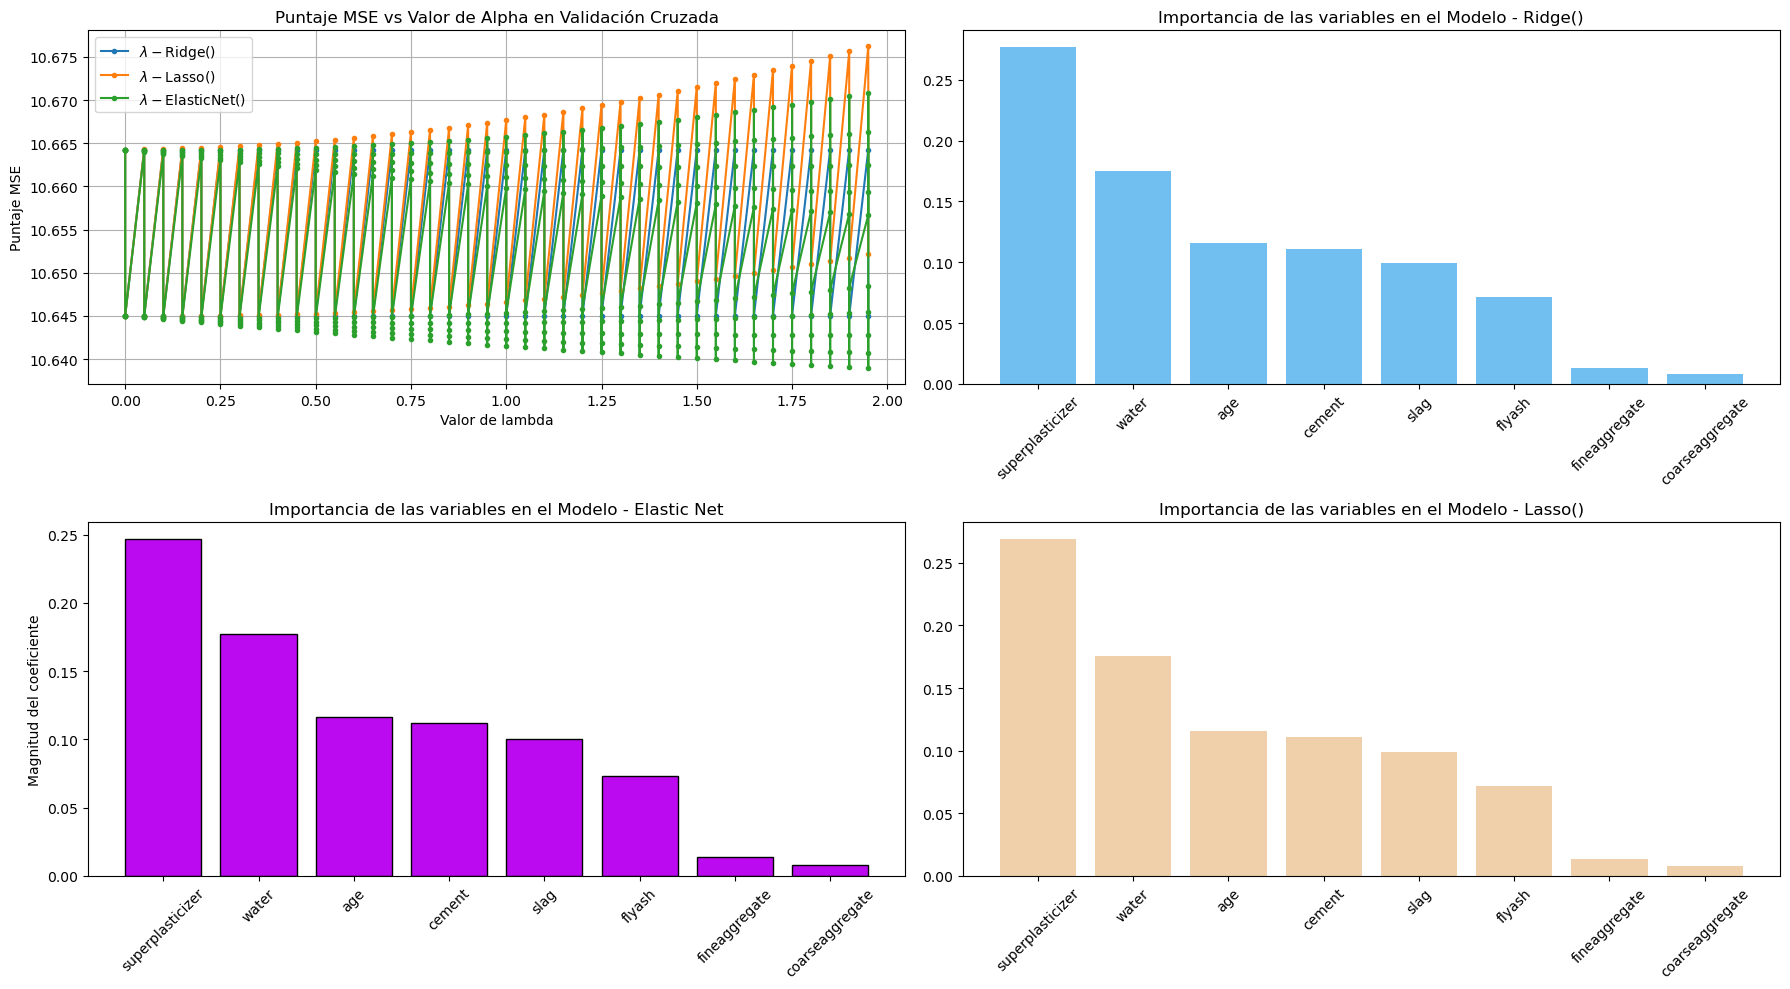

In [378]:
regularizacion(X_train,y_train,X_test,y_test)